In [1]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Uncomment if you don't want to use GPU.

In [6]:
import sys
sys.path.append('ANA_model')
from ANA import ANA, load_model
model = load_model(ANA(), 'weights/ANA')

In [7]:
# Test data for S66x8
import numpy as np
data = np.load('test_data/S66x8.npy', allow_pickle=True).item()

In [8]:
predictions, references = [], []
for key in data:
    graph_1, graph_2, coords_1, coords_2, multipoles, dmats, smile_1, smile_2, elements_1, elements_2, ref_energies = data[key]
    total, es_term, in_term, ex_term, disp_term = model(graph_1, graph_2, coords_1, coords_2, multipoles, dmats)
    references.append(ref_energies)
    predictions.append(total)
predictions, references = np.array(predictions), np.array(references)

1.083208845351649

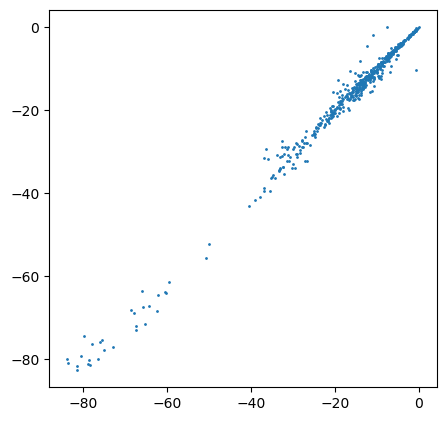

In [9]:
import matplotlib.pyplot as plt
plt.figure(0, figsize=(5, 5), dpi=100)
plt.scatter(predictions, references, s=1)
np.mean(np.abs(predictions - references)) # If everything works out, the MAE should be ~ 1.0832

### For general use:
- Use GraphBuilder to construct topological graphs
- Use model_multipoles to predict multipoles

In [10]:
# Load multipole model and graph builder
sys.path.append('utilities')
from GraphBuilder import GraphBuilder
# Set path accordingly to load multipole model
sys.path.append('path_to_multipole_model')
from MultipoleNetRes32 import load_model as load_model_multipoles

In [33]:
builder = GraphBuilder()
model_multipoles = load_model_multipoles()

Z = {'H': 1,'C': 6,'N': 7,'O': 8,'F': 9,'S': 16,'Cl': 17,}

In [23]:
# Build graph from coordinates
graph = builder.topological_from_coords(coordinates, elements)
core_charges = np.expand_dims([Z[e] for e in elements], axis=-1).astype(np.float32)
# Predict multipoles for each monomer
monopoles, dipoles, quadrupoles = model_multipoles.predict(coordinates, elements)
quadrupoles /= 2 
# ....

In [ ]:
# Model expects
# graph_1: Topological graph for molecule 1
# graph_2: Topological graph for molecule 2
# coords_1: Monomers coordinates for molecule 1 in A [BxNx3]
# coords_2: Monomers coordinates for molecule 2 in A [BxMx3]
# multipoles: Multipoles in the following order: 
# multipoles = (monos_1, monos_2, dipos_1, dipos_2, quads_1, quads_2, core_charges_1, core_charges_2)
#              monos_1: Monopoles for monomer 1: [BxNx1]
#              monos_2: Monopoles for monomer 2: [BxMx1]
#              dipos_1: Dipoles for monomer 1: [BxNx3]
#              dipos_2: Dipoles for monomer 2: [BxMx3]
#              quads_1: Quadrupoles for monomer 1: [BxNx3x3] # Quadrupoles are expected to be detraced and include factor 0.5
#              quads_2: Quadrupoles for monomer 2: [BxMx3x3]
#              core_charges_1: Charge of nuclei for monomer 1: [Nx1]
#              core_charges_2: Charge of nuclei for monomer 2: [Mx1]
# dmats: Distances between monomer 1 and monomer 2: [BxNxM]
model(graph_1, graph_2, coords_1, coords_2, multipoles, dmats)